# *AYUDANTÍA - REPASO I2 - Introducción a la Ciencia de Datos - IMT2200*
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)


In [79]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

## Statmodels y Sklearn

Statsmodels es un paquete de Python que permite a los usuarios explorar datos, estimar modelos estadísticos y realizar pruebas estadísticas.

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Scikit-learn es una biblioteca de aprendizaje automático de software gratuito para el lenguaje de programación Python

In [81]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

Datos

In [82]:
dataset = load_diabetes(as_frame=True)
X = dataset.data
y = dataset.target

In [83]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Regresiones y Clasificación

Un sistema de clasificación predice una categoría, mientras que una regresión predice un valor.

## Clasificaciones

KNN

In [84]:
df=X[['age','bp']]

In [85]:
from sklearn.preprocessing import StandardScaler

# normalización con StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(df) #esto genera un np.array

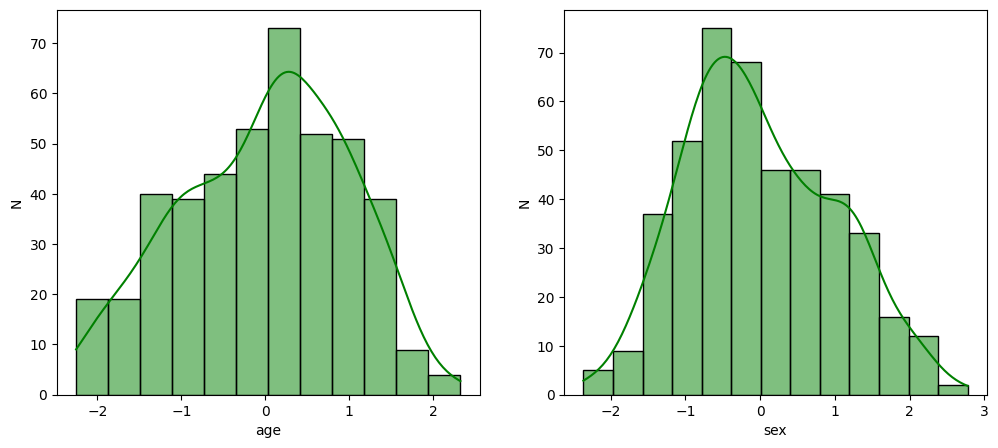

In [86]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ax=ax1, data=X_sc[:,0], kde=True, color='green')
ax1.set_xlabel('age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2, data=X_sc[:,1], kde=True, color='green')
ax2.set_xlabel('sex')
ax2.set_ylabel('N')
fig.savefig('scaled.png', dpi=300, bbox_inches='tight')

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 5)


In [89]:
len(X_train)

309

In [90]:
# definimos el modelo y especificamos sus hiperparámetros
classifier = KNeighborsClassifier(n_neighbors = 5)

# ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test)

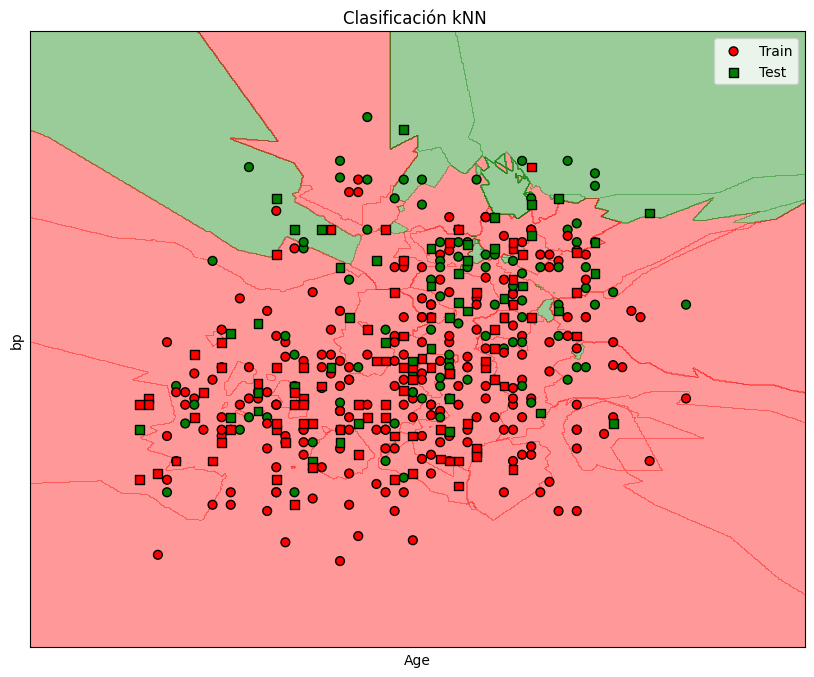

In [92]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1,0.01),
                     np.arange(X_train[:,1].min()-1,X_train[:,1].max()+1,0.01))


#predecimos la clase de salida para cada par de puntos (X1,X2) de la grilla
#X1, X2 son matrices con los valores en cada punto de la grilla.
#X1.ravel() son las versiones "flattened". Para la predicción, transformamos X1, X2 en vectores
# luego con reshape volvemos a darle la forma de matrix (grilla) al vector de resultados
X_grid = np.array([X1.ravel(), X2.ravel()]).T
mesh_predict = classifier.predict(X_grid).reshape(X1.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

#grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
im = ax.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))
#plot de los datos de entrenamiento
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Train')
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Test')

ax.set_title('Clasificación kNN ')
ax.set_xlabel('Age')
ax.set_ylabel('bp')

xlabels = np.arange(10,70,10)
xticks = (xlabels-X_train[:,0].mean())/X_train[:,0].std()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize=14)

ylabels = np.arange(10000,180000,20000)
yticks = (ylabels-X_train[:,1].mean())/X_train[:,1].std()
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels, fontsize=14)

# limites de los ejes
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())
ax.legend()

In [114]:
from sklearn import metrics
#matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred_test)

print('Confusion matrix:', cm)



Confusion matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [115]:
report0 = metrics.classification_report(y_test,y_pred_test)
print(report0)

              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         3
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         0
        49.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         2
        53.0       0.00      0.00      0.00         0
        54.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         0
        57.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00         1
        65.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

¿Como mejorar mis resultados?

https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

**Arboles de decision**

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 5)

In [118]:
from sklearn.tree import DecisionTreeClassifier

#definimos el modelo y especificamos sus hiperparámetros
classifier = DecisionTreeClassifier(max_depth=6)

#ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

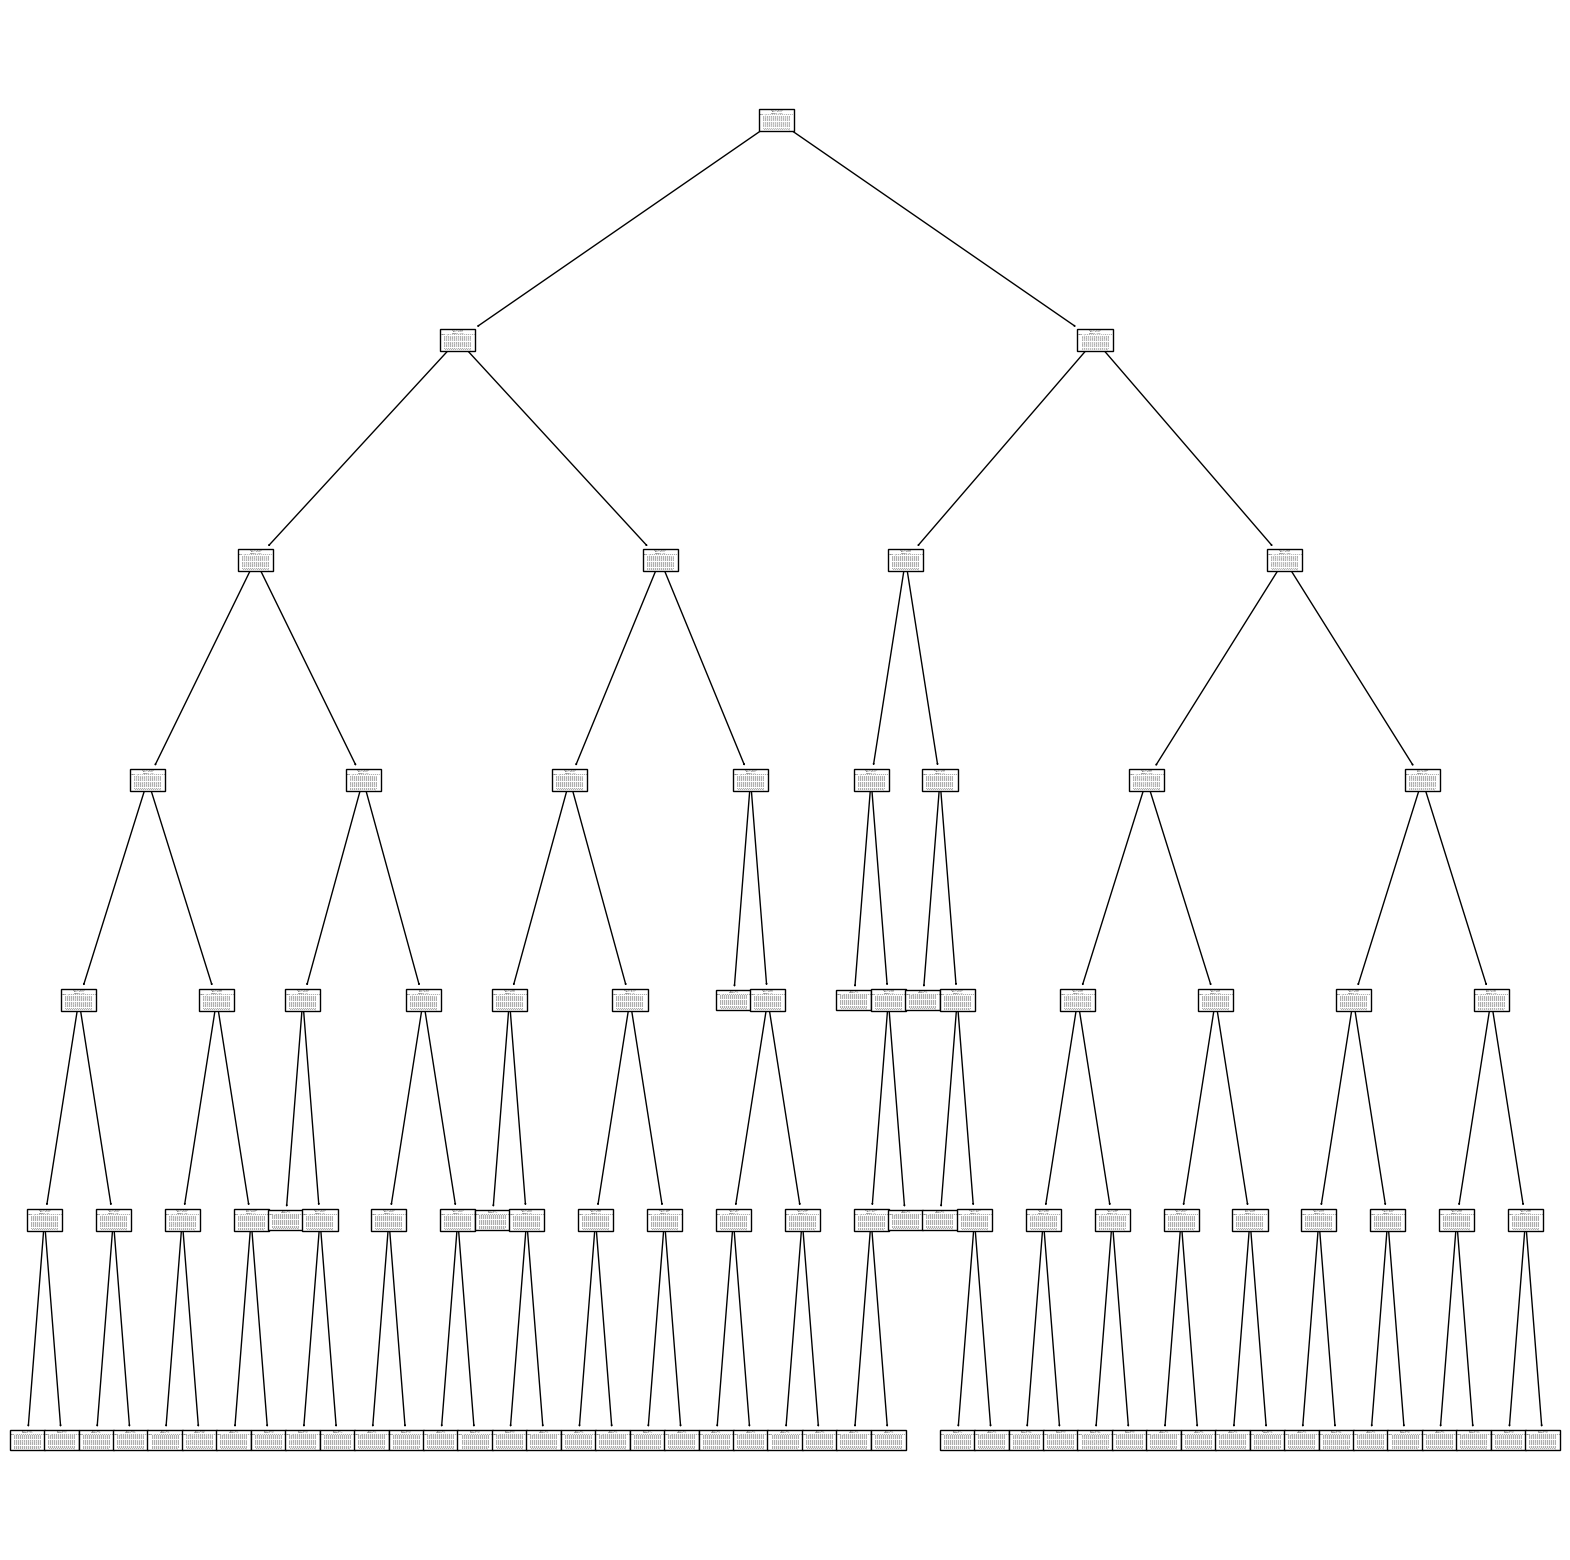

In [97]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plot_tree(classifier, ax=ax);

In [98]:
y_pred_test = classifier.predict(X_test)

In [119]:
#matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred_test) #true,pred


print('Confusion matrix:',cm)

Confusion matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:
report0 = metrics.classification_report(y_test,y_pred_test)
print(report0)

              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         3
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         0
        49.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         2
        53.0       0.00      0.00      0.00         0
        54.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         0
        57.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00         1
        65.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Regresión LASSO, Ridge y Logistica

Regresion lineal

In [121]:
df2=X['age']

In [122]:
#separación en datos de entrenamiento y prueba
Xtrain,Xtest,ytrain,ytest = train_test_split(df2,y,test_size = 0.25,random_state=1)

#Xtest = np.sort(np.random.rand(10))
#ytest = true_fun(Xtest) + np.random.randn(10) * 0.1

#reshape de matriz X
Xtrain=Xtrain[:, np.newaxis]
Xtest=Xtest[:, np.newaxis]

#vector x continuo para graficar modelo
x_vals = np.linspace(np.min(X), np.max(X), 100).reshape(-1,1)

<ipython-input-122-fe0720cd4696>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xtrain=Xtrain[:, np.newaxis]
<ipython-input-122-fe0720cd4696>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xtest=Xtest[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain t

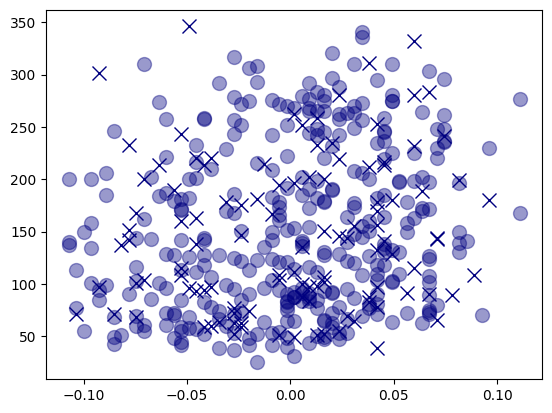

In [123]:
from matplotlib.pyplot import plot_date


plt.plot(Xtrain, ytrain, 'o',color='navy',label='Train',markersize=10,alpha=0.4)
plt.plot(Xtest, ytest, 'x',color='navy',mfc='None',label='Test',markersize=10)



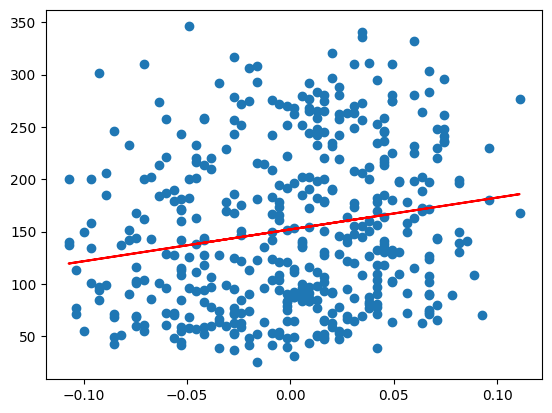

In [124]:
lr = LinearRegression()
lr.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df2.values

lr.fit(x.reshape(-1, 1),y)
plt.scatter(x.reshape(-1, 1), y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

### Regularalizaciones

Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

### Ridge

La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado  (||β||22=∑pj=1β2j)
 . A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero.

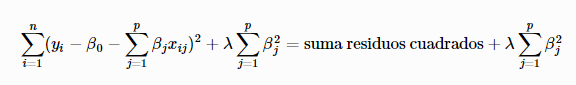

In [125]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV


In [126]:
df2=X['bmi']

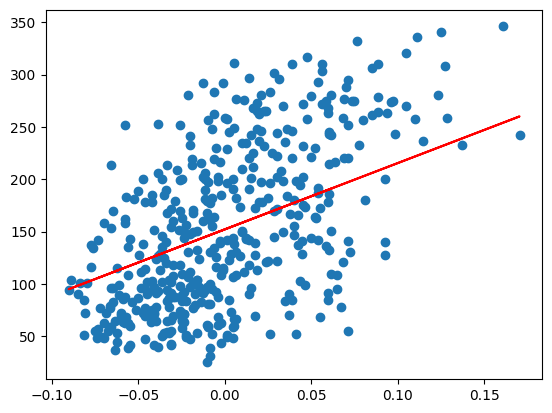

In [127]:
lr = Ridge(alpha=.5)


lr.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df2.values
lr.fit(x.reshape(-1, 1),y)
plt.scatter(x.reshape(-1, 1), y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

### Lasso

La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión  (||β||1=∑pj=1|βj|)
 . A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero.

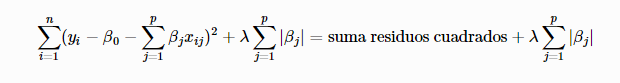

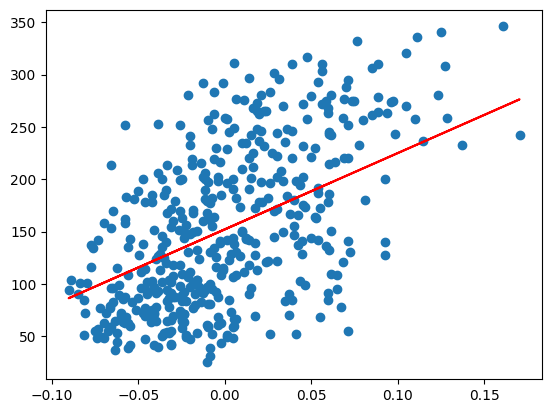

In [128]:
lr = Lasso(alpha=.5)
lr.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df2.values
lr.fit(x.reshape(-1,1),y)
plt.scatter(x, y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

Logistica

La regresión logística es un modelo estadístico utilizado para analizar la relación entre una variable dependiente categórica y una o más variables independientes.

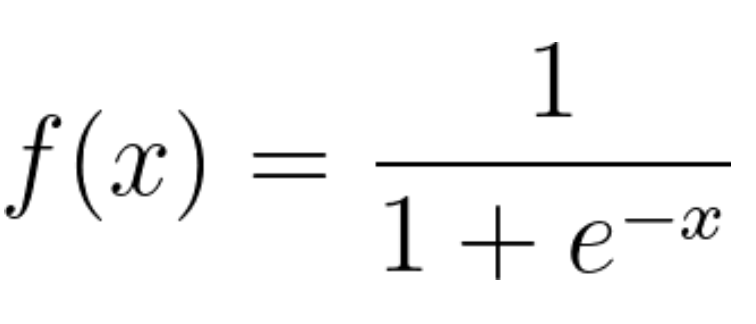

https://cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python

¿Pero como elegimos los alpha en la regresion lasso y ridge?

## Validacion cruzada

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones.

¿Que tenemos en python?

GridSearchCV es una técnica de validación. Lo que hace es ejecutarse a través de los diferentes parámetros que se introducen en la cuadrícula de parámetros y extraer los mejores valores y combinaciones de parámetros.

EJEMPLO LASSO

In [131]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Lasso()

params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(model, params, cv=10)

grid.fit(X, y)

grid.best_estimator_.get_params()

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.46316545038091783
0.1


EJEMPLO RIDGE

In [112]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()

params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(model, params, cv=10)
grid.fit(X, y)
grid.best_estimator_.get_params()
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.46332219117960366
0.1


Statmodels

Nos entrega un umary detallado de los test de los modelos.

In [113]:
import statsmodels.api as sm

df2=X['bmi']

model = sm.OLS(y, df2).fit()

residuals = model.resid
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Tue, 14 Nov 2023   Prob (F-statistic):                    1.51e-08
Time:                        19:08:06   Log-Likelihood:                         -2882.5
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     441   BIC:                                      5771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

https://cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python